# NETFLIX DATASET ANALYSIS

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [2]:
# Read in the Netflix CSV as a DataFrame
df = pd.read_csv("netflix_data.csv")

In [3]:
# display first five rows of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [4]:
# displat information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


The information above shows that there are no missing values. There are 4812 rows and 10 columns.

In [5]:
# display count of unique values in type column
df.type.value_counts()

Movie      4677
TV Show     135
Name: type, dtype: int64

There are more movies than TV shows in this dataset.

In [6]:
# display count of unique values in genre column
df.genre.value_counts()

Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
International TV          39
Crime TV                  30
Uncategorized             25
Independent Movies        20
British TV                20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Kids                      10
Anime Series               9
Docuseries                 7
TV Shows                   4
Romantic Movies            3
TV Comedies                3
TV Action                  2
Romantic TV                1
TV Horror                  1
Classic                    1
Reality TV                 1
LGBTQ Movies               1
Name: genre, dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

There are no duplicate values.

### Observations
1. Date added and release_year columns should be in datatime format.

In [8]:
# convert the two columns to appropriate datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'], format = '%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   datetime64[ns]
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 413.7+ KB


## Data Analysis


In [9]:
# summary statistics of dataset
df.describe()

,duration
count,4812.000000
mean,99.566708
std,30.889305
min,1.000000
25%,88.000000
50%,99.000000
75%,116.000000
max,253.000000


In [10]:
df[df['duration']==1]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016-01-01,1,A genetics professor experiments with a treatm...,International TV
94,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019-01-01,1,Multiple women report their husbands as missin...,TV Shows
151,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,2020-01-01,1,Gloria Groove and Alexia Twister make drag dre...,International TV
181,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,2018-03-09,2018-01-01,1,Everything Aiko knew was a lie. Now she's join...,Anime Series
197,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...",United States,2020-07-01,2019-01-01,1,A big-hearted girl helps her Fuzzly friends wh...,Kids
...,...,...,...,...,...,...,...,...,...,...,...
4410,s7089,TV Show,Til Death Do Us Part,"Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao...","Wen Chen-ling, River Huang, Lin He-xuan, Phoeb...",Taiwan,2019-08-15,2019-01-01,1,Based on the speculative short stories of Mirr...,International TV
4427,s7119,TV Show,To the Lake,Pavel Kostomarov,"Viktoriya Isakova, Kirill Käro, Aleksandr Roba...",Russia,2020-10-07,2020-01-01,1,Facing the end of civilization when a terrifyi...,International TV
4536,s7314,TV Show,Unabomber - In His Own Words,Mick Grogan,Ted Kaczynski,Canada,2020-02-22,2018-01-01,1,"The CIA attempts to turn Ted Kaczynski, aka th...",Crime TV
4580,s7386,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,2020-05-08,2020-01-01,1,A writer in creative and marital crises finds ...,International TV


Assessment of some of these movies shows that they are infact more than one minute long.

In [11]:
# count number of rows where movie duration is one minute
df[df['duration']==1].shape

(97, 11)

Since there are many records and we do not have access to original database, we have no choice but to continue with analysis. On normal circumstances, this issue should be escalated to the right team to ensure accuracy in data collection and rectify data accuracy issue.

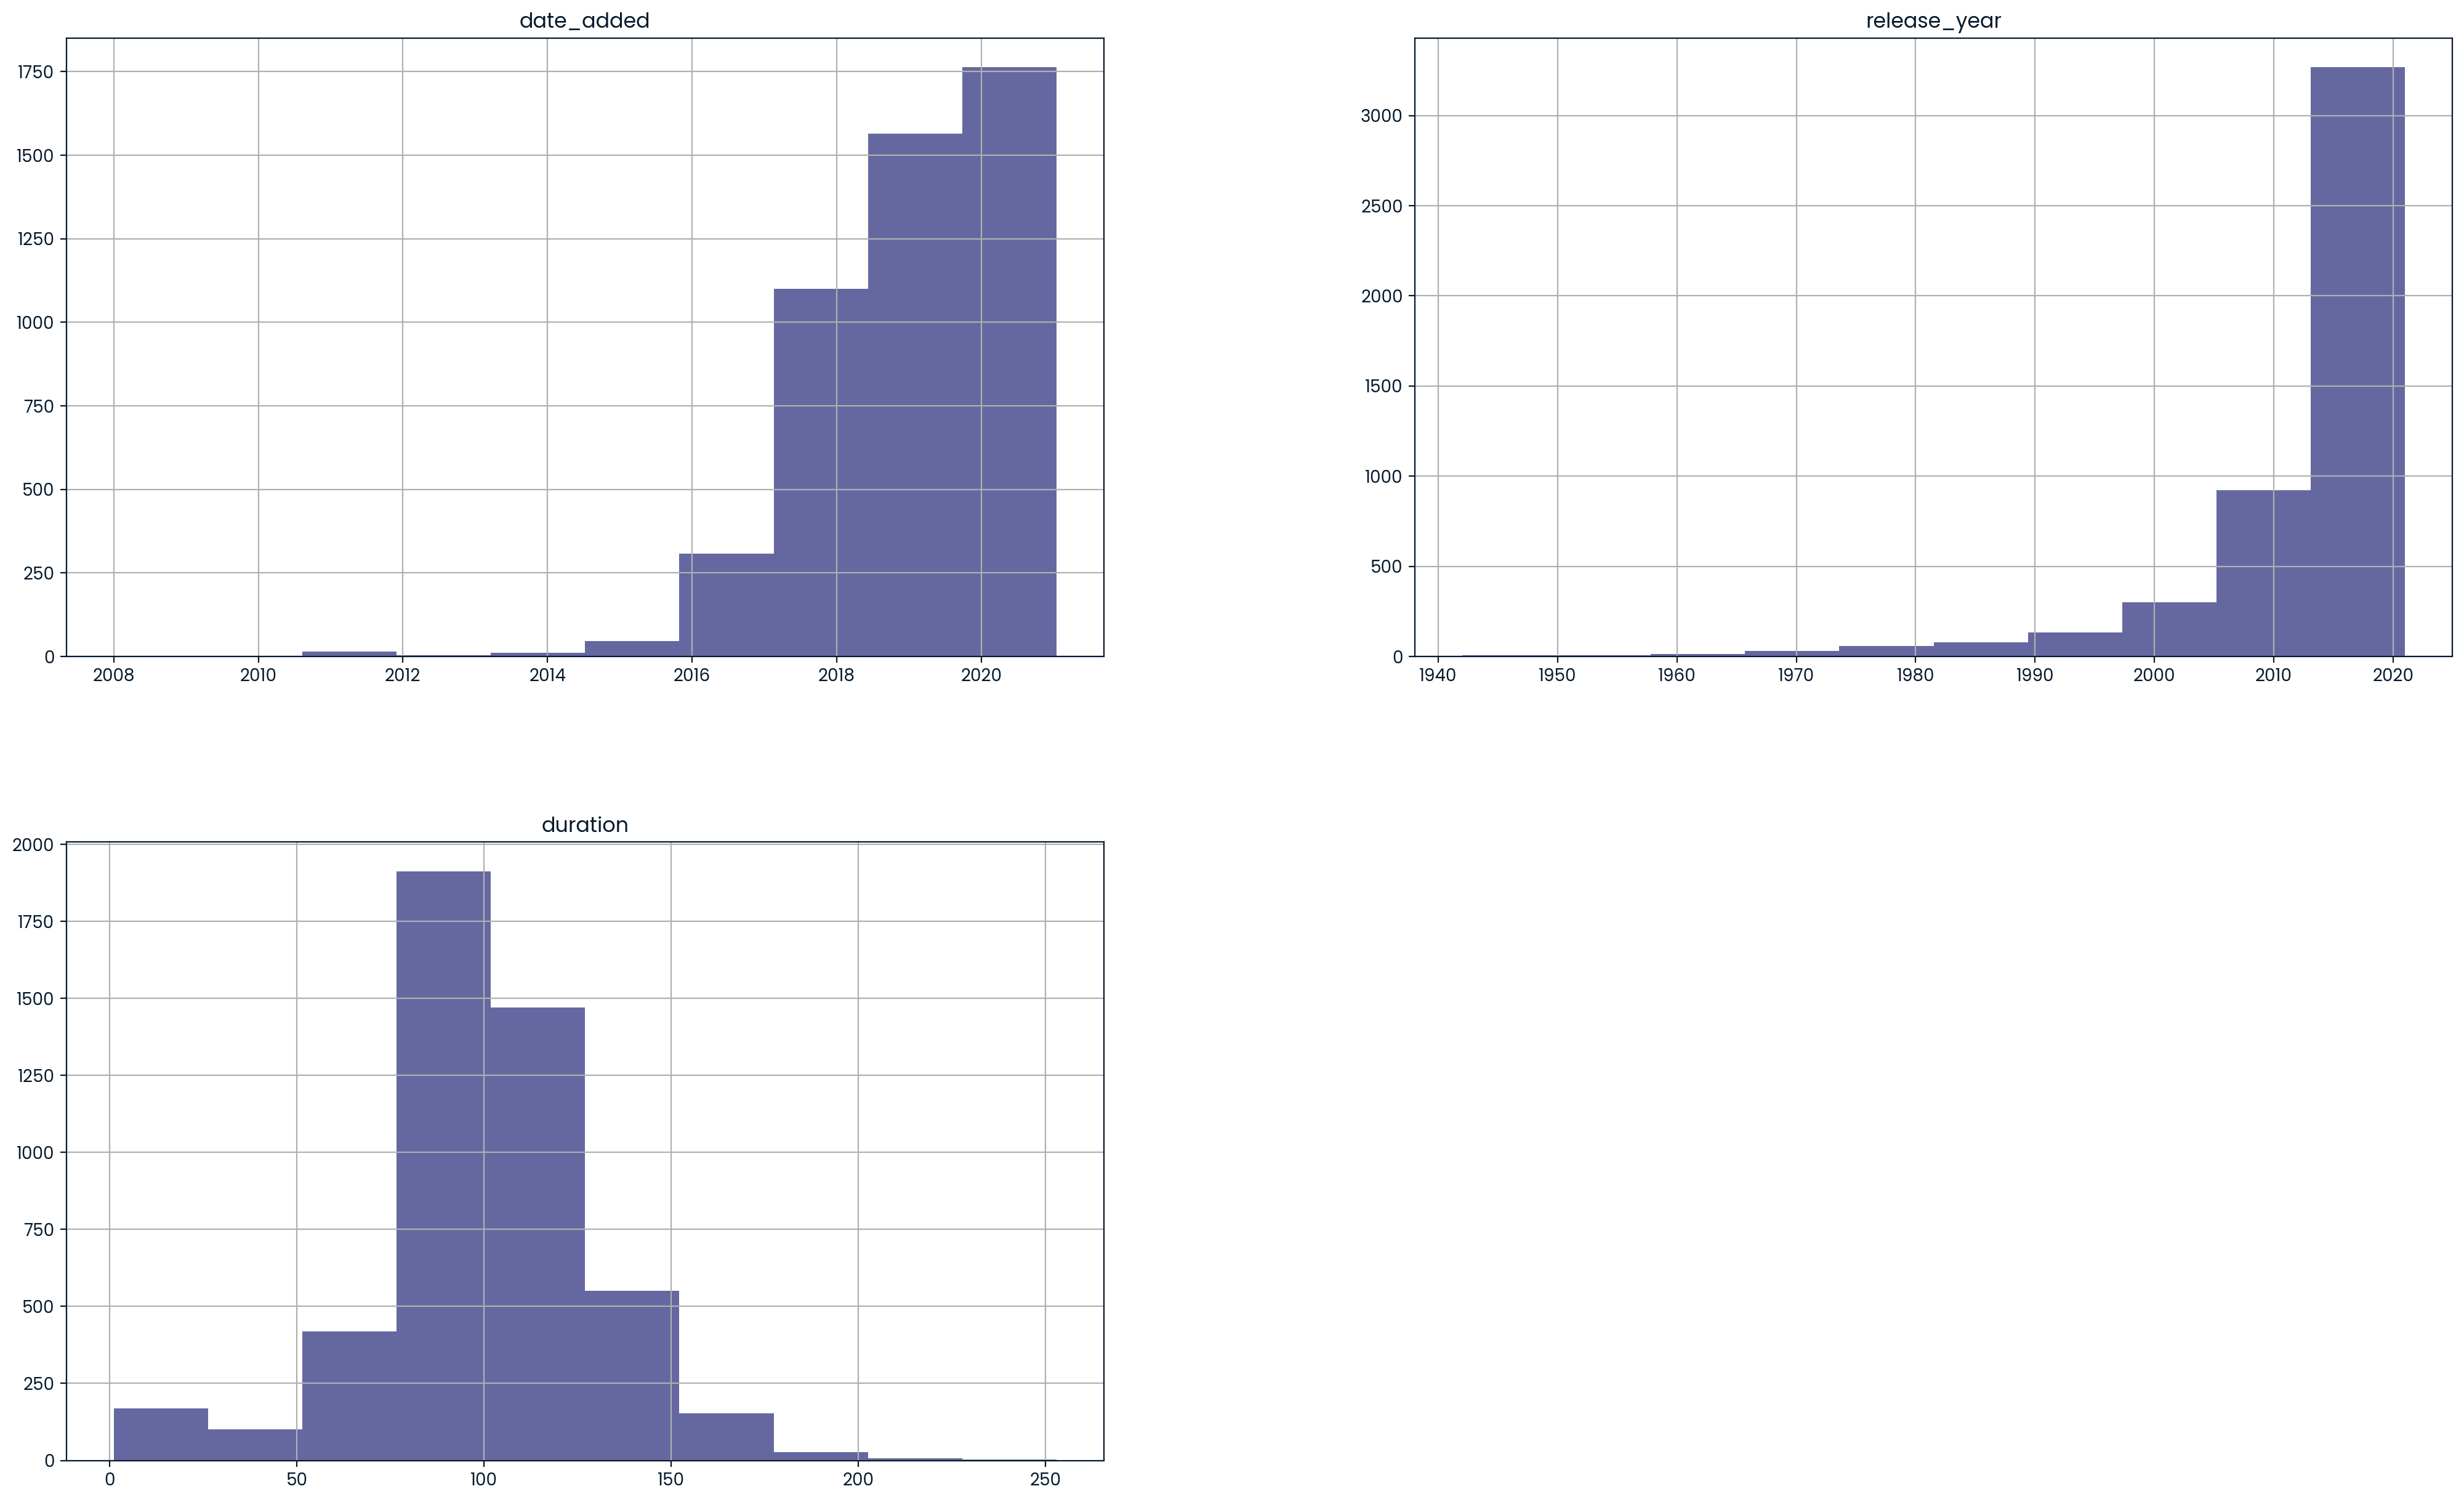

In [12]:
hist_df = df[['date_added', 'release_year', 'duration']]
hist_df.hist(figsize = (25,15));

We can see that there is an upward trend in the number of movies released and added each year. The duration of the movies seems to follow a normal distribution with majority of movies lasting around the 100 minutes. This confirms the summary statistics earlier presented.

### Questions 
1. What are the most common words in movie and TV show titles and description?

In [13]:
# create a variable for the words in the title
title = " ".join(word for word in df.title)
# create a variable for the words in the description
descr = " ".join(word for word in df.description)
# define stopwords 
my_stop_words = ENGLISH_STOP_WORDS.union(["the","a","an","Movie","Story","Don't"])
# create word cloud for the title
word_cloud_1 = WordCloud(stopwords = my_stop_words, collocations = False, background_color = 'white').generate(title)
# create word cloud for the description
word_cloud_2 = WordCloud(stopwords = my_stop_words, collocations = False, background_color = 'white').generate(descr)

**Plotting Title Word Cloud**

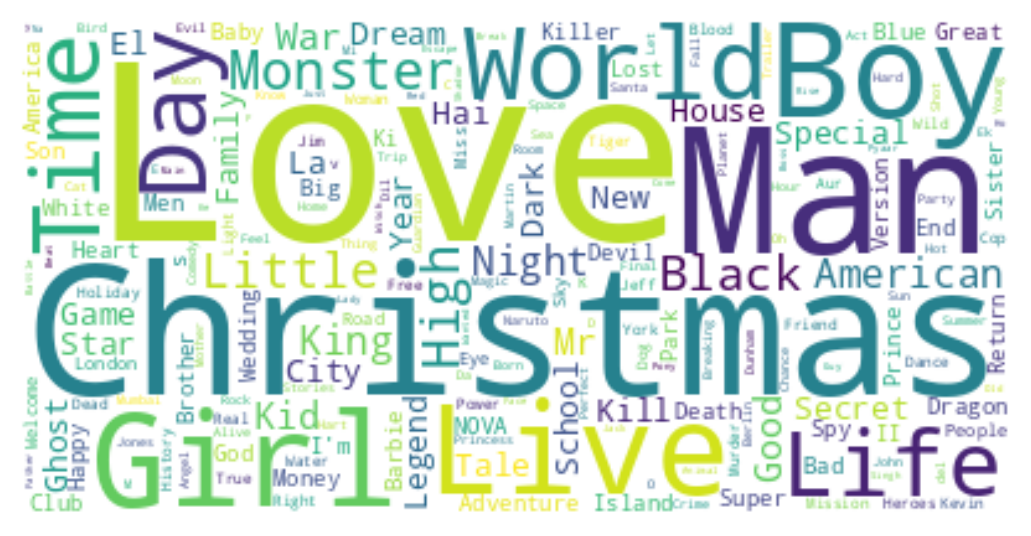

In [14]:
plt.imshow(word_cloud_1, interpolation='bilinear') 
plt.axis("off") 
plt.show()

The most frequent words appearing in Netflix movies titles are "Christmas","Love","Boy","Man","Girl","Live", etc. as can be seen from above.

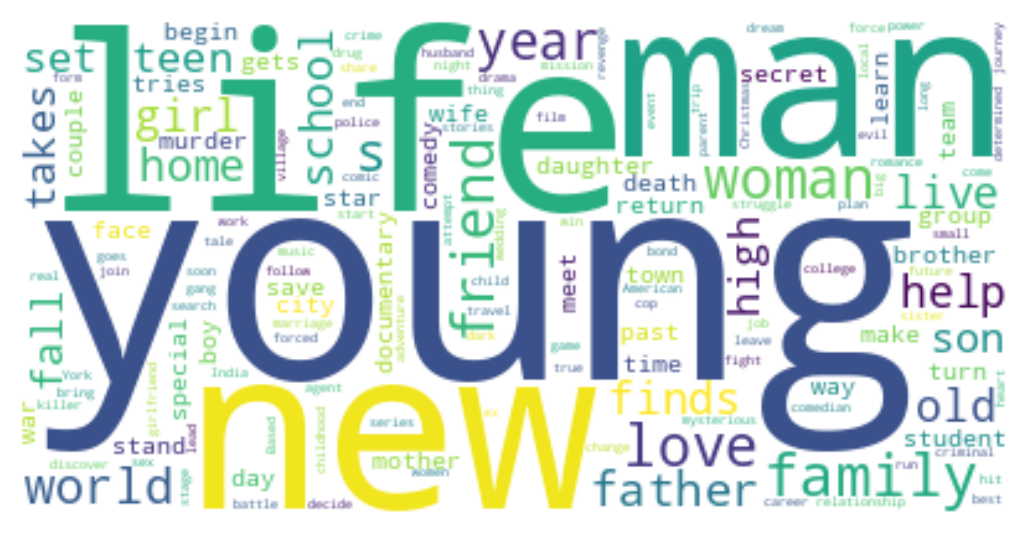

In [15]:
plt.imshow(word_cloud_2, interpolation='bilinear') 
plt.axis("off") 
plt.show()

The most prevalent keywords in the description include "young","life","new","man","family","love", etc. as can be seen from the wordcloud above.

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

2. Which countries produce the most content on Netflix?

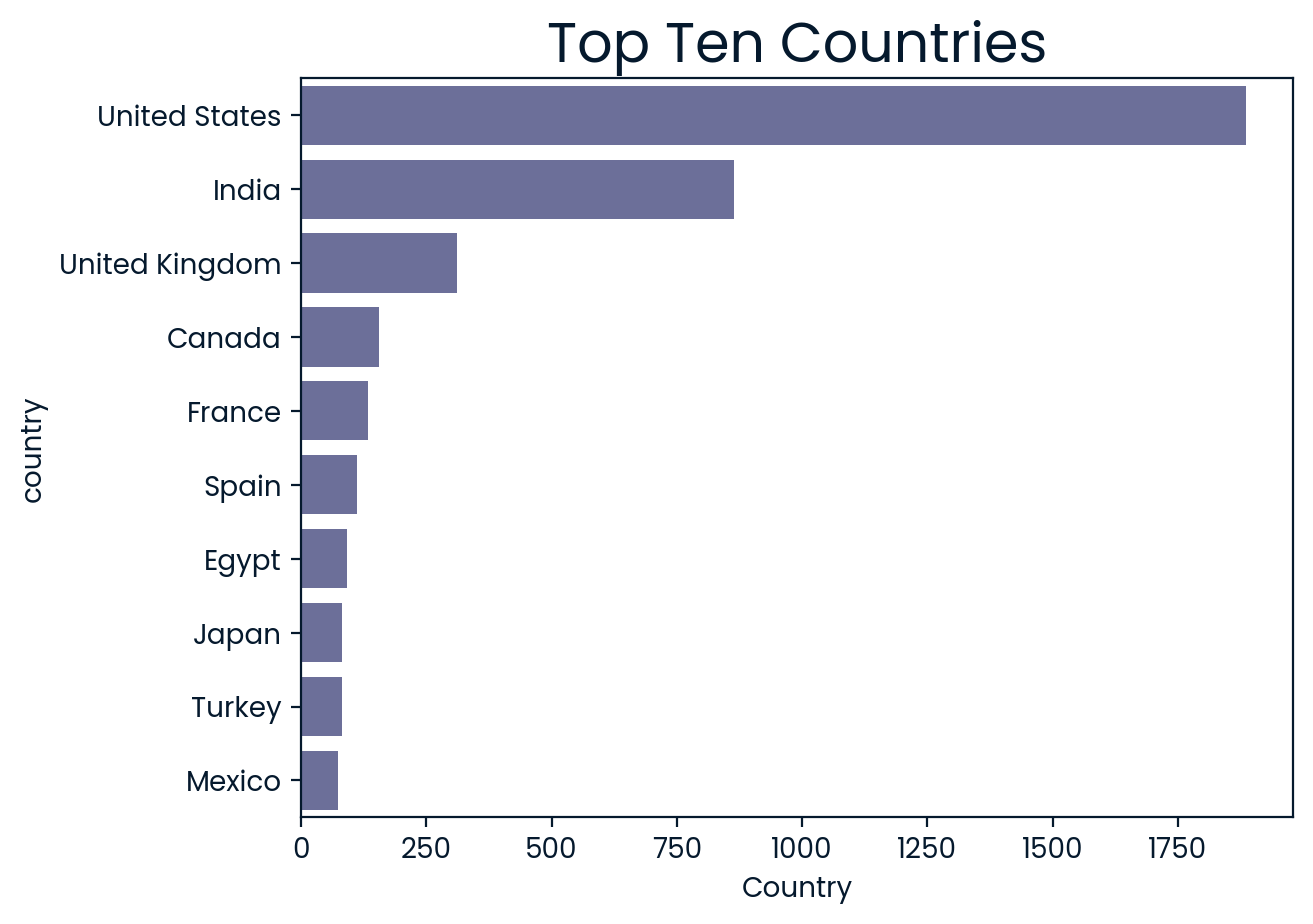

In [17]:
# sort values by country and filter for top ten
country = df.groupby("country")["show_id"].count().reset_index()
topc = country.nlargest(10,'show_id')
# plotting top country distribution for netflix movies
sns.barplot(data = topc, x = 'show_id', y = 'country')
plt.xlabel('Count')
plt.xlabel('Country')
plt.title("Top Ten Countries", fontsize=20);

3. What are the top ten genres of movies are aired by Netflix?

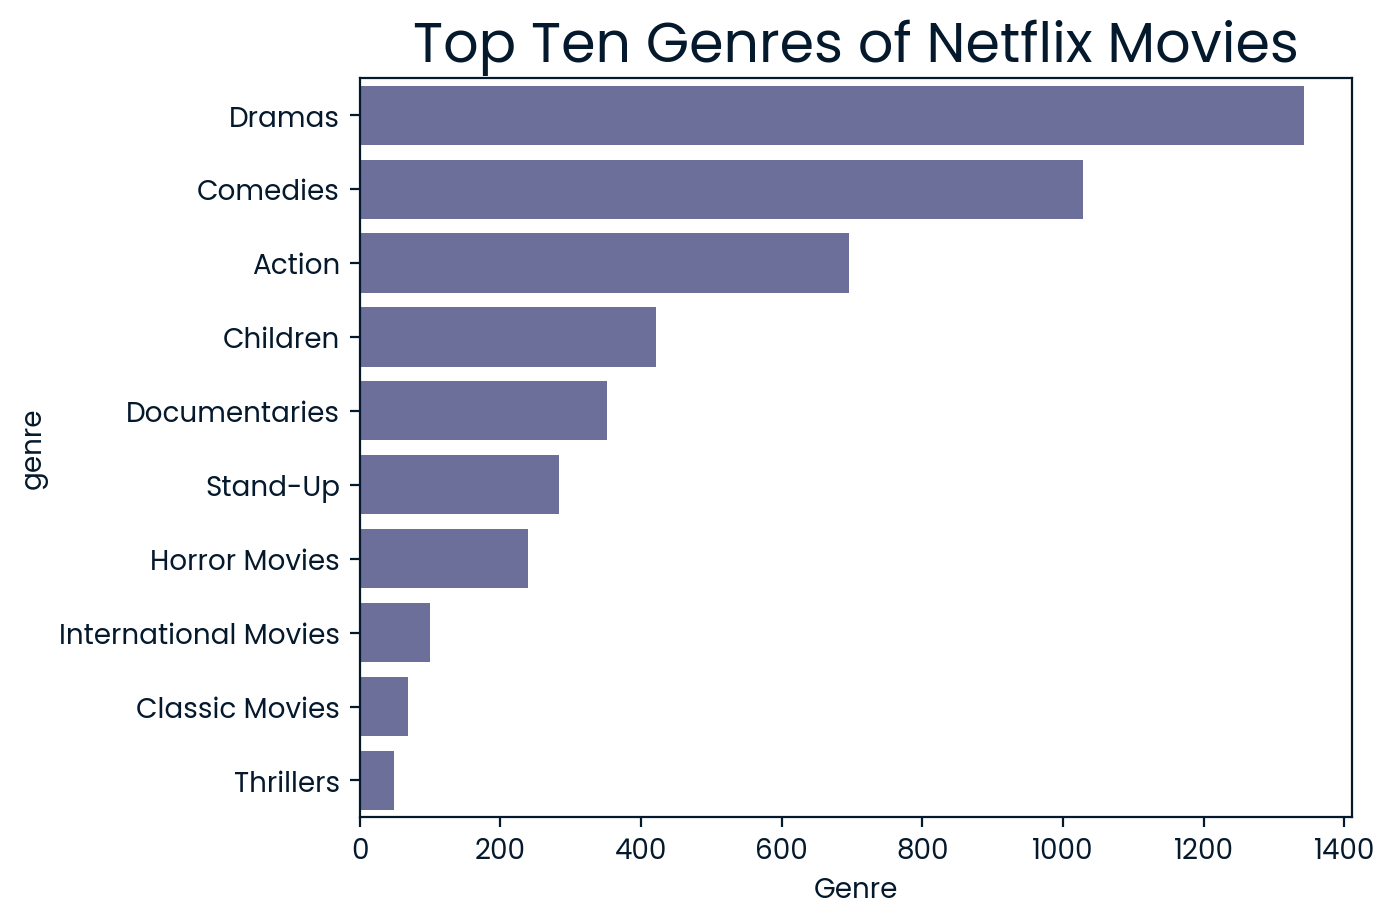

In [18]:
# sort values by genre and filter for top ten
genre = df.groupby("genre")["show_id"].count().reset_index()
topg = genre.nlargest(10,'show_id')
# plotting top genre of netflix movies
sns.barplot(data = topg, x = 'show_id', y = 'genre')
plt.xlabel('Count')
plt.xlabel('Genre')
plt.title("Top Ten Genres of Netflix Movies", fontsize=20);

3. How has the number of movies and TV shows on Netflix changed over the years?

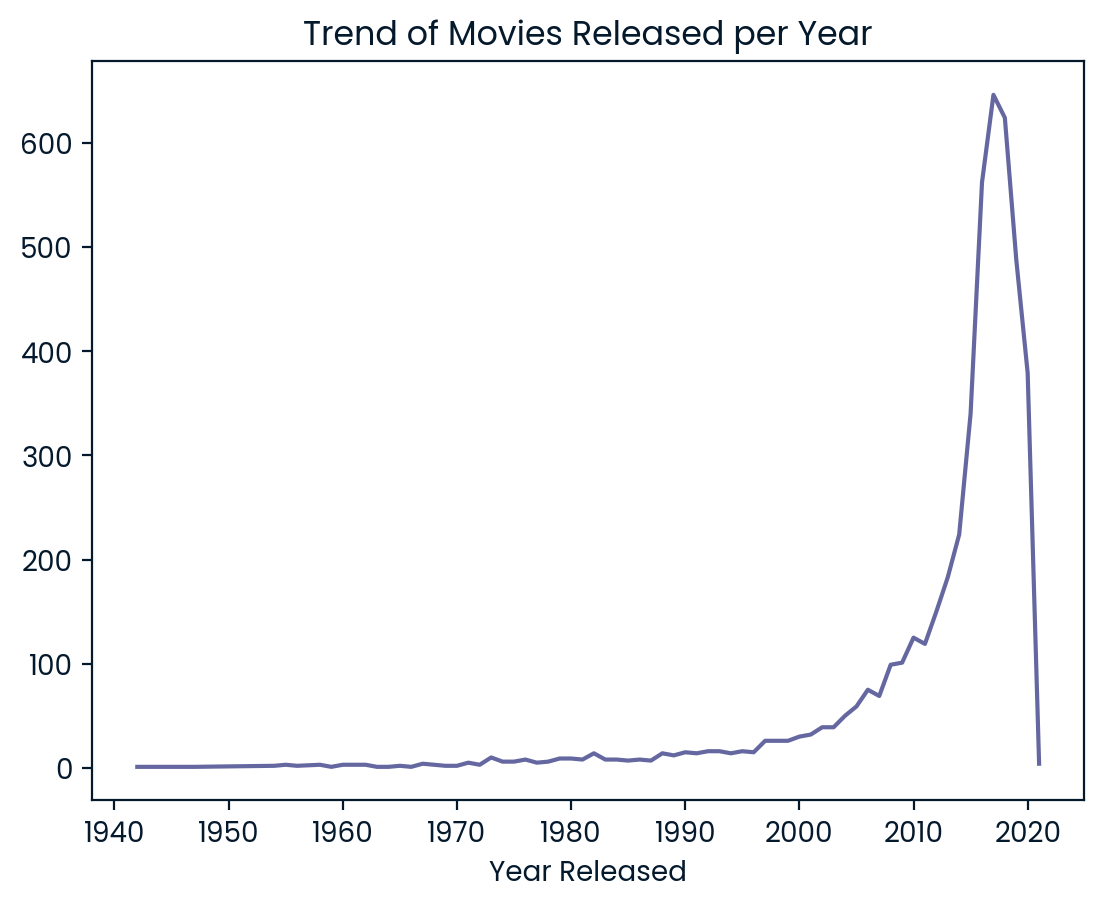

In [19]:
# sort and filter by release_year
by_date = pd.Series(df['release_year']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='count')
# plotting
plt.plot(df_date['date'], df_date['count']);
plt.xlabel('Year Released')
plt.title('Trend of Movies Released per Year')
plt.show()


There is an upward trend of movies released over the years. Let's see how movies are released over the months.

4. Which months have the highest number of movies added?

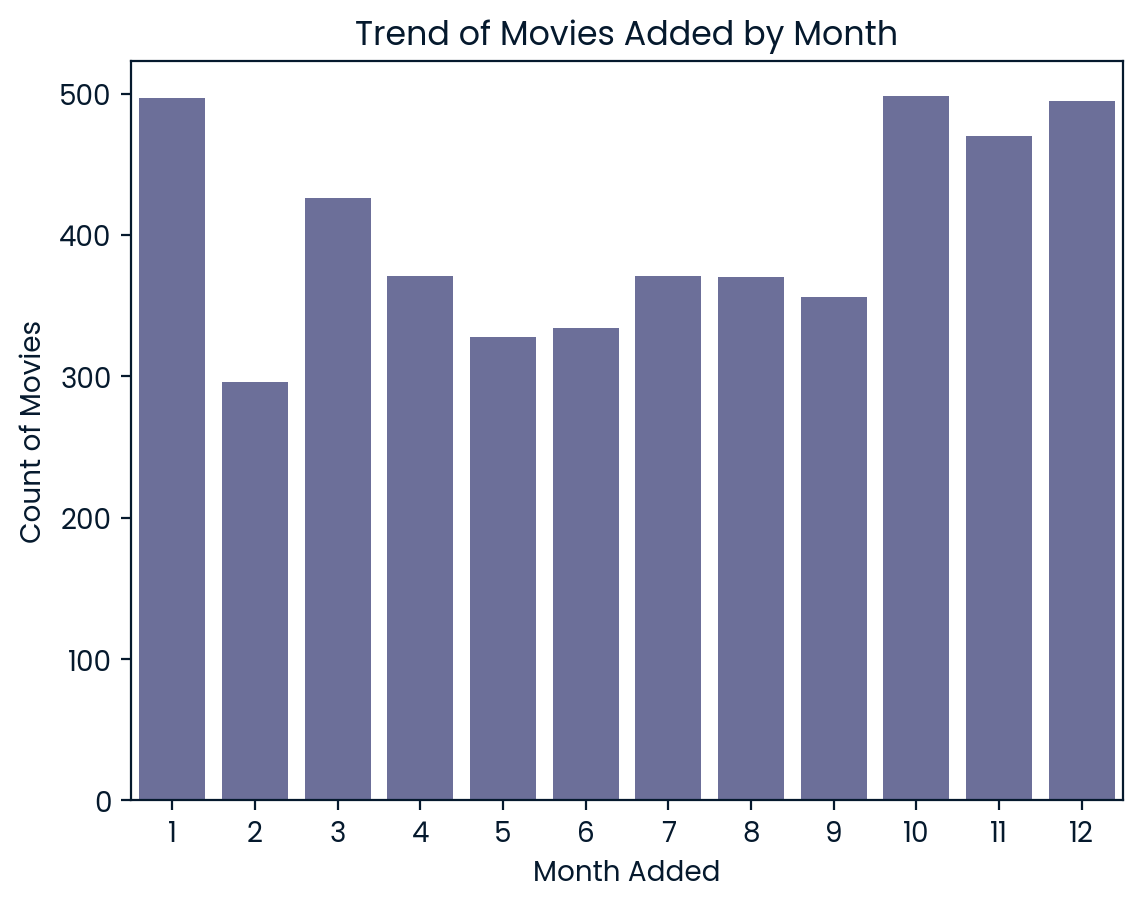

In [20]:
# sort by month
df['month'] = df['date_added'].dt.month

#plotting trend by month
sns.countplot(data =df, x='month')
plt.title('Trend of Movies Added by Month');
plt.xlabel('Month Added')
plt.ylabel('Count of Movies')
plt.show()

January, October and December have the highest number of movies added. This is most likely due to the holidays in those months.

5. How has genre changed after covid-19?

In [25]:
# Define event date for COVID-19 lockdowns, assuming lockdown started 1st March, 2020
event_date = pd.to_datetime('2020-03-01')

# Create subsets for analysis
before_event = df[df['date_added'] < event_date]
after_event = df[df['date_added'] >= event_date]

# Genre distribution before and after
genre_before = pd.Series(before_event['genre']).value_counts().nlargest(10)
genre_before = genre_before.rename_axis('genre').reset_index(name = 'count')
genre_after = pd.Series(after_event['genre']).value_counts().nlargest(10)
genre_after = genre_after.rename_axis('genre').reset_index(name = 'count')

,genre,count
0,Dramas,1042
1,Comedies,764
2,Action,548
3,Documentaries,303
4,Children,303
5,Stand-Up,248
6,Horror Movies,197
7,International Movies,73
8,Classic Movies,51
9,Thrillers,38


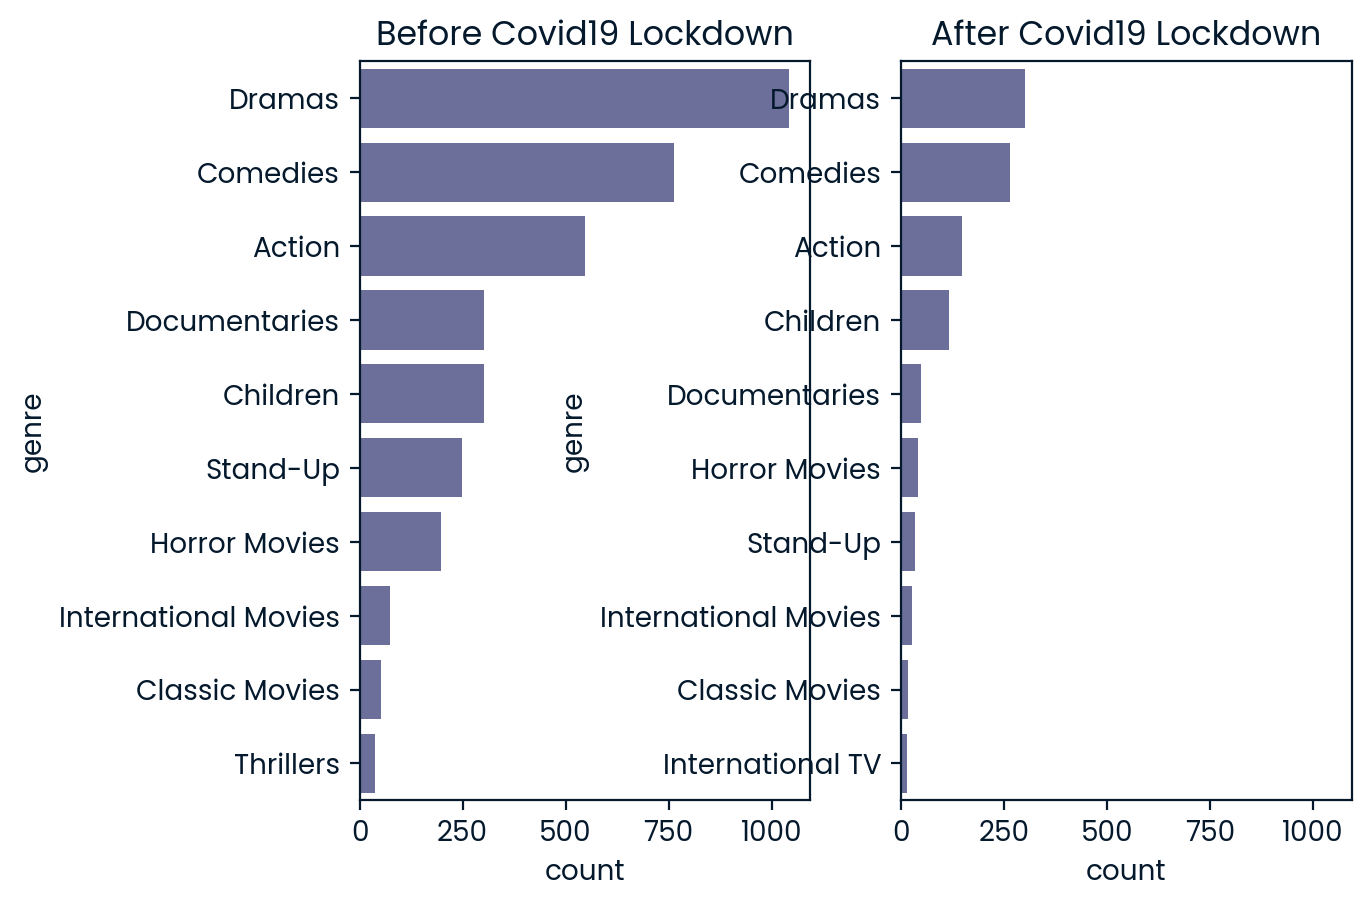

In [26]:
figure, ax = plt.subplots(1,2, sharex = True);
sns.barplot(ax = ax[0], data = genre_before, y= 'genre', x = 'count')
sns.barplot(ax = ax[1], data = genre_after, y= 'genre', x = 'count')
ax[0].set_title('Before Covid19 Lockdown');
ax[1].set_title('After Covid19 Lockdown');